# 1. Introduction
*Include a brief intoduction to the topic, the research question (what you are trying to predict), where the data comes from, a description of the dataset (number of rows, what a row represents, the columns, etc.), and what you will do in this project.*

In this project, I will be predicting the churn for customers at a bank. The dataset is for ABC Multistate Bank and was obtained from Kaggle (https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset). The dataset includes 12 columns and 10,000 rows, where each row represents a customer. The dataset includes the following columns: `customer_id` (numerical, a unique ID given to identify each customer), `credit_score` (numerical, a score that identifies the creditworthiness of a customer), `country` (categorical, represents the country where the customer is located - it can be one of three countries: Spain, Germany, or France), `gender` (categorical, represents the customer's gender), `age` (numerical, represents the customer's age), `tenure` (numerical, representing how long the customer has been at the bank given in years), `balance` (numerical, representing the amount of USD the customer has at the bank), `products_number` (numerical, representing the number of products the customer has at the bank), `credit_card` (is a binary categorical variable, representing if the customer has a credit card at the bank or not - 0 = no, 1 = yes), `active_member` (is a binary categorical variable, representing if the customer is an active member at the bank), `estimated_salary` (numerical, representing the estimated total income of the customer in USD), and `churn` (used as the target variable, is a binary categorical variable and represents if the customer has left the bank during some period of time - 0 = they have not, 1 = they have). 

In this project, I will start by performing exploratory data analysis to attempt to find any patterns that may be apparent in the data and will make various plots and tables to do this. This will allow me to identify what features might be the biggest drivers of churn. Next, I will perform data preprocessing to clean the data, perform feature engineering, feature selection, data transformation, and normalizing or standardizing. Finally, I will select an appropriate machine learning algorithm and train and evaluate the model on how well it is able to predict the churn. Once the model is trained and evaluated, I will attempt to optimize the model to improve its accuracy at predicting customer churn. 

## 1.1 Hypotheses
I am going to assume that `age` may be a big predictor in churn, where older customers are more likely to churn. I think this because younger people do not really put too much thought into their bank because in many cases, that is taken care of by the parents, so I am going to assume that many younger people just follow the bank that their parents go to and do not consider switching banks very often. 

I believe `balance` also could be a big driver in churn because customers with a very low balance (especially a balance of $0) are more likely to churn because it is much easier for a person to switch banks if they do not have to worry about transferring money from one bank to another. This could be the same case for `tenure`, where people that have been a customer at the bank for a shorter period of time might be more likely to churn.

Another feature I think would be a big driver in churn is `active_member`. I think it is fairly obvious to assume people that are not a current active member will have a higher churn rate than people that are an active member, because they have already left the bank, so this might show some abnormal findings in the data. 

# 2. Data Collection
Load libraries and load dataset.

In [2]:
from IPython.display import clear_output

In [3]:
# load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve

import warnings
warnings.filterwarnings('ignore')
clear_output()

In [4]:
# load dataset
df = pd.read_csv("customers.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 3. EDA: Descriptive Statistics and Visualizations
**Understand the data**. Summarize the data and provide descriptive statistics and data visualizations to see what patterns might be in the data. Also, identify any issues in the data like class imbalance, missing values, or outliers that need to be addressed.

In [5]:
# get number of rows and columns
df.shape

(10000, 12)

I have 10,000 rows and 12 columns.

In [6]:
# see column names
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

These are all the column names.

In [7]:
# see if there are any nulls and see the column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


The only categorical variables are `country` and `gender`. Both of these categorical variables are nominal (have no inherent order). These will need to be encoded before performing any machine learning tasks. 

In [8]:
# check for any NAs
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

There are 0 null values in the dataset.

In [9]:
# check for duplicates
df.duplicated().sum()

0

There are 0 duplicates in the dataset.

In [10]:
# see statistical summary
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Our binary categorical variables are `credit_card`, `active_member`, and `churn`. From this summary, we can see that about 70% of the customers in the dataset have a credit card (based on the mean `credit_card`), about 50% of the customers in the dataset are an active member, and we have many more customers in the dataset that did not churn, compared to those who did churn (roughly 20% of the customers churned). Also, the `customer_id` column will be irrelevant for our model, so we can drop that column when we perform the data cleaning. 

We see that we have an imbalance target variable, `churn`. It has a mean of 0.2037, meaning that 20.37% of the customers have churned, while almost 80% have not. This imbalance could lead to a biased model that may not perform well on the minority class (churned customers). We should fix this imbalance by oversampling the minority class, undersampling the majority class, or using a combination of both (e.g., SMOTE)

We also see that some features, such as `credit_score`, `age`, `balance`, and `estimated_salary` have different ranges and scales. This might affect the performance of certain ML algorithms, such as k-Nearest Neighbors or SVM's, which are sensitive to the scale of input features. Therefore, we should standardize or normalize these numerical features before using them.

We also notice that `country` and `gender` are not included in this summary because they are categorical variables, therefore we need to encode them before using our ML algorithms, especially ones that require numerical input. 

In [11]:
df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

As we noted before, we see the dataset has many more customers that did not churn compared to customers that did. Again, we will need to fix this imbalance before working with our machine learning model.

## 3.1 Visualizations

### 3.1.0 Content Analysis

In [12]:
# styled summary table with mean values
features = df.keys()
features = features.drop('churn')
df.groupby('churn')[features].mean().style.background_gradient(cmap = 'BuGn')

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
churn,,,,,,,,,
0,15691167.881703,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,15690051.964654,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


From this summary table, we see that the customers who might churn more are, on average, older, have a higher balance, and have a higher estimated salary by looking at the churn row of the table and identifying the green cells. 

### 3.1.1 Histogram of all numeric variables

array([[<AxesSubplot:title={'center':'customer_id'}>,
        <AxesSubplot:title={'center':'credit_score'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'products_number'}>],
       [<AxesSubplot:title={'center':'credit_card'}>,
        <AxesSubplot:title={'center':'active_member'}>,
        <AxesSubplot:title={'center':'estimated_salary'}>],
       [<AxesSubplot:title={'center':'churn'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

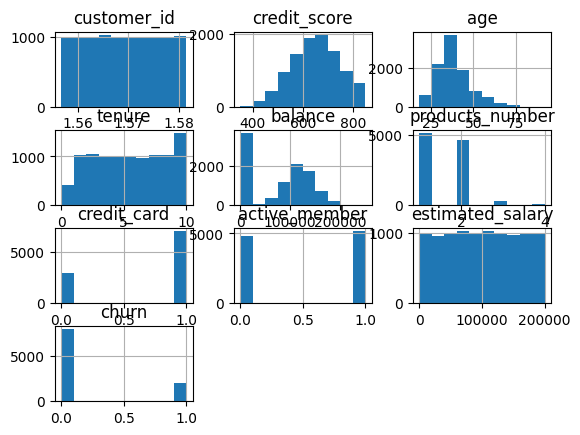

In [13]:
df.hist()

Looking at the histograms of all numeric variables (except `credit_card`, `active_member`, and `churn` which are all binary categorical), we see that...

### 3.1.2 Churn rate by country and gender

In [14]:
# first, lets see the value counts of the countries
df['country'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

In [15]:
# calculate churn rate by country and gender
churn_rate_by_country_gender = df.groupby(['country', 'gender'])['churn'].mean().reset_index()

# pivot data for plotting
churn_country_gender_pivot = churn_rate_by_country_gender.pivot_table(
    index='country', columns='gender', values='churn'
    )
churn_country_gender_pivot

gender,Female,Male
country,,
France,0.203450,0.127134
Germany,0.375524,0.278116
Spain,0.212121,0.131124


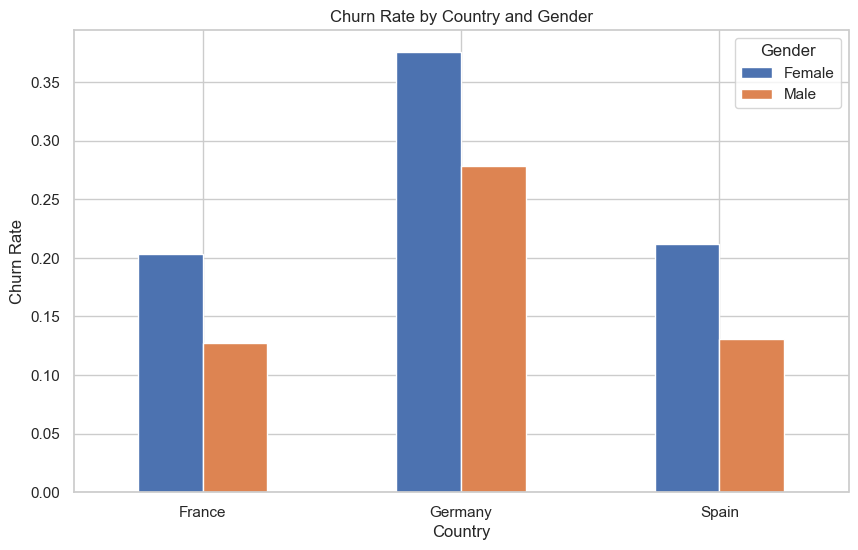

In [16]:
# grouped bar chart of churn rate by country and gender
sns.set(style='whitegrid')
ax = churn_country_gender_pivot.plot(kind='bar', figsize=(10, 6), rot=0)
ax.set_xlabel('Country')
ax.set_ylabel('Churn Rate')
ax.set_title('Churn Rate by Country and Gender')
ax.legend(title='Gender', loc='upper right')
plt.show()

We find that females have a significantly higher churn rate than males in all three countries. We also find that Germany has the highest churn rate among the three countries for both genders. Lastly, we find that France and Spain have very similar churn rates, with Spain having a slightly higher churn rate for both genders. 

However, we should note that the number of customers in each country is different, with France having the most and Spain having the least. A smaller sample size can cause biased results in churn rate, so this should be considered when interpreting these results. We are also unsure if the difference in churn rates between countries is statistically significant, which should also be taken into consideration when interpreting these results. If we wanted to further examine that, we could conduct a hypothesis test to answer that question. 

**TLDR: Germany churns the most. Females churn more than males.**

### 3.1.3 Age groups and churn rates
*Exploring age groups and churn rates.*

In [17]:
# binning the age feature
agebins = [18, 30, 45, 60, 100]
agelabels = ['18-30', '31-45', '46-60', '60+']
df['age_bins'] = pd.cut(df['age'], bins=agebins, labels=agelabels)

In [18]:
# see count of age bins
df['age_bins'].value_counts()

31-45    5921
18-30    1946
46-60    1647
60+       464
Name: age_bins, dtype: int64

The age group with the most customers is the 31-45 age group by far. The age group with the least amount of customers is the 60+ age group, which has the least number of customers by far. 

In [19]:
# calculate churn rate for age groups
churn_rate_by_age_group = df.groupby('age_bins')['churn'].mean()
churn_rate_by_age_group

age_bins
18-30    0.075026
31-45    0.157406
46-60    0.511233
60+      0.247845
Name: churn, dtype: float64

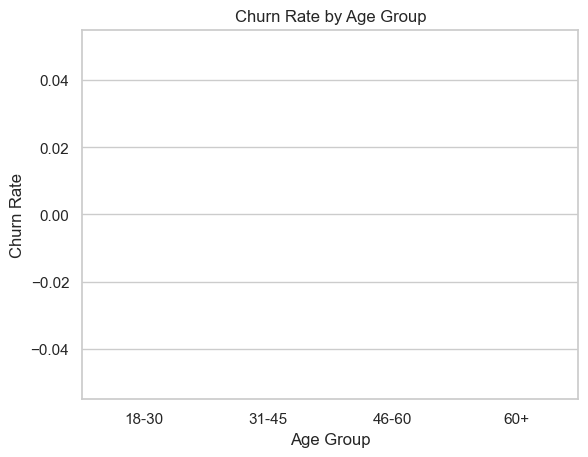

In [20]:
# plot the counts of each age group
sns.barplot(x=df['age_bins'], 
            y=df['age_bins'].value_counts())
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Age Group')
plt.show()

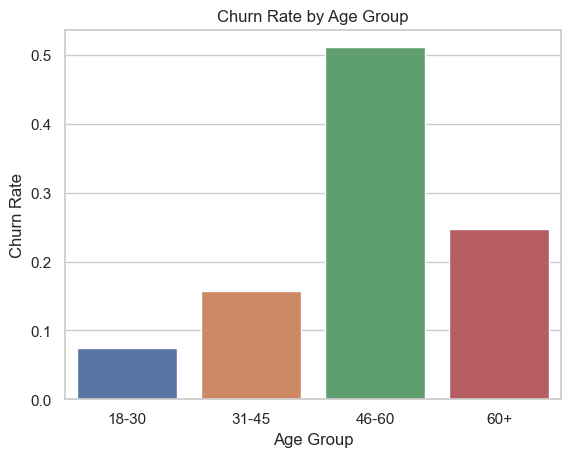

In [21]:
# plot of churn rate by age group
sns.barplot(x=churn_rate_by_age_group.index, 
            y=churn_rate_by_age_group.values)
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Age Group')
plt.show()

The age group with the highest churn rate is the 46-60 age group by far. This age group actually churns more than they do not. The age group that churns the least is the 18-30 age group. So, we can see that older people tend to churn more often than younger people. What is causing this to happen?

**TLDR: Older people churn more than younger people. More specifically, ages 46-60.**

Now, I wonder what this plot would look like if we also included gender just like the first plot...

In [22]:
# get churn rate for each gender in each age group
churn_rate_age_gender = df.groupby(['age_bins', 'gender'])['churn'].mean().reset_index()

# pivot data for plot
churn_rate_age_gender_pivot = churn_rate_age_gender.pivot_table(
    index='age_bins', columns='gender', values='churn'
)

churn_rate_age_gender_pivot


gender,Female,Male
age_bins,,
18-30,0.099315,0.055140
31-45,0.196728,0.126025
46-60,0.572993,0.449697
60+,0.300469,0.203187


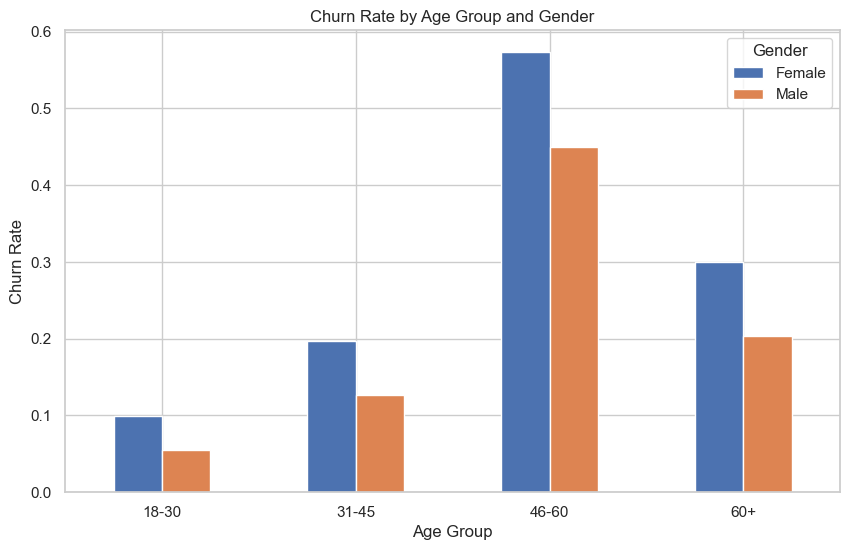

In [23]:
ax = churn_rate_age_gender_pivot.plot(kind='bar', figsize=(10,6), rot=0)
ax.set_xlabel('Age Group')
ax.set_ylabel('Churn Rate')
ax.set_title('Churn Rate by Age Group and Gender')
ax.legend(title='Gender', loc='upper right')
plt.show()

No interesting findings here. We again find that females churn more often than males do in every age group and we find that the 46-60 age group has the highest churn rate for both genders across all age groups. 

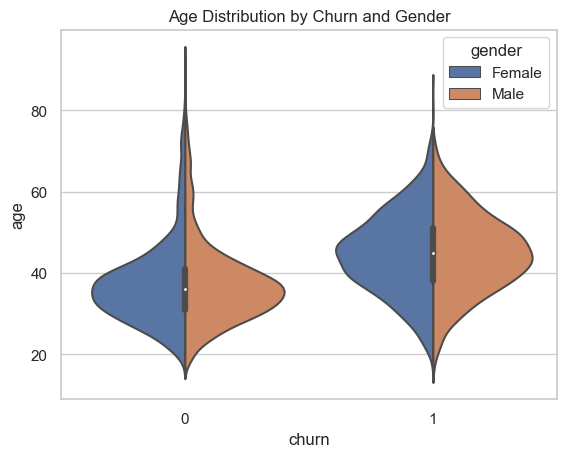

In [24]:
sns.violinplot(x='churn', y='age', hue='gender', data=df, split=True)
plt.title('Age Distribution by Churn and Gender')
plt.show()

The findings from the violin plot also agree with our previous findings that older people tend to churn more than younger people.

### 3.1.4 Balance vs. Credit Score

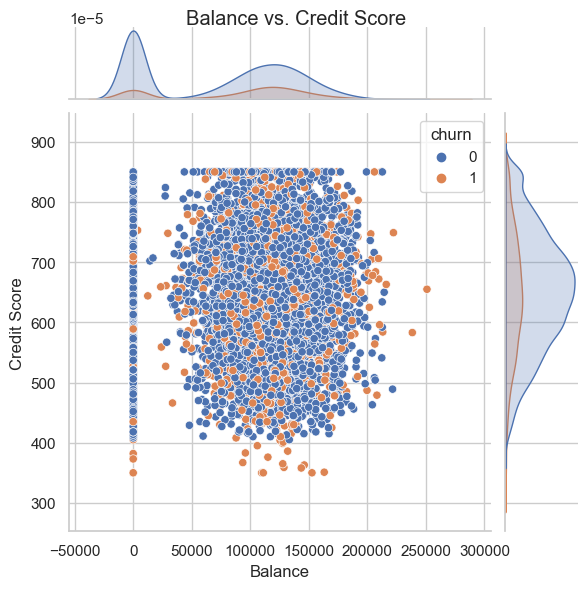

In [25]:
# jointplot - scatterplot with marginal histograms
g = sns.jointplot(data=df, x='balance', y='credit_score', hue='churn')

# set title for joint plot
g.fig.suptitle('Balance vs. Credit Score')
# adjust the title position to avoid overlapping
g.fig.subplots_adjust(top=0.95)
plt.xlabel('Balance')
plt.ylabel('Credit Score')

# Show the plot
plt.show()

From this plot, we can see...

### 3.1.5 Churn rate by tenure

In [26]:
churn_rate_by_tenure = df.groupby('tenure')['churn'].mean()
churn_rate_by_tenure

tenure
0     0.230024
1     0.224155
2     0.191794
3     0.211100
4     0.205258
5     0.206522
6     0.202689
7     0.172179
8     0.192195
9     0.216463
10    0.206122
Name: churn, dtype: float64

In [27]:
# churn rate by tenure line plot
fig = px.line(churn_rate_by_tenure, 
              x=churn_rate_by_tenure.index,
              y=churn_rate_by_tenure.values,
              title='Churn Rate by Tenure (in years)',
              labels={
                  'tenure': 'Tenure',
                  'y': 'Churn Rate'
              }
)

fig.show()

In [28]:
# # churn rate by tenure line plot
# sns.lineplot(data=churn_rate_by_tenure, 
#              x=churn_rate_by_tenure.index, 
#              y=churn_rate_by_tenure.values)
# plt.xlabel('Tenure (years)')
# plt.ylabel('Churn Rate')
# plt.title('Churn Rate by Tenure')
# plt.show()

We find that the customers that churn the most are the customers that have been a customer for less than 1 year. The customers that are least likely to churn are customers that have been there for 7 years.

### 3.1.6 Churn rate by number of products 

In [29]:
# churn rate for each combination of products number and country
churn_rate_by_products_country = df.groupby(['products_number', 'country'])['churn'].mean().reset_index()

# pivot data for plotting
churn_rate_pivoted = churn_rate_by_products_country.pivot_table(index='products_number', columns='country', values='churn')
churn_rate_pivoted


country,France,Germany,Spain
products_number,,,
1,0.224344,0.428466,0.218673
2,0.057034,0.121154,0.073542
3,0.788462,0.895833,0.787879
4,1.000000,1.000000,1.000000


Wow! 100% of customers that have 4 products from the bank all churned. This might indicate a genuine issue with customer retention when customers have 4 products. Let's see how many customers have 4 products in the dataset to see why this might be happening. Is it because we only have a couple customers with 4 products and they just so happened to leave? Or is there enough customers that have 4 products from the bank where we should start investigating why this is happening?

In [30]:

customers_by_products_country = df.groupby(['products_number', 'country']).size().reset_index(name='count')

# Pivot the data for easier visualization
count_pivoted = customers_by_products_country.pivot_table(index='products_number', columns='country', values='count')
print(count_pivoted)

country          France  Germany  Spain
products_number                        
1                  2514     1349   1221
2                  2367     1040   1183
3                   104       96     66
4                    29       24      7


We find that the majority of customers have 1 or 2 products, the churn rate is relatively lower for customers with 1 or 2 products than those with 3 or 4 products, and the number of customers with 3 or 4 products is much lower compared to those with 1 or 2 products. This means the high churn rates for customers with 3 or 4 products is less representative of the general population due to the small sample size. However, the very high churn rates still warrants further investigation because 60 customers (customers with 4 products) is not a small enough number to where this can be brushed off or happened due to chance. Let's see a visualization of these results.

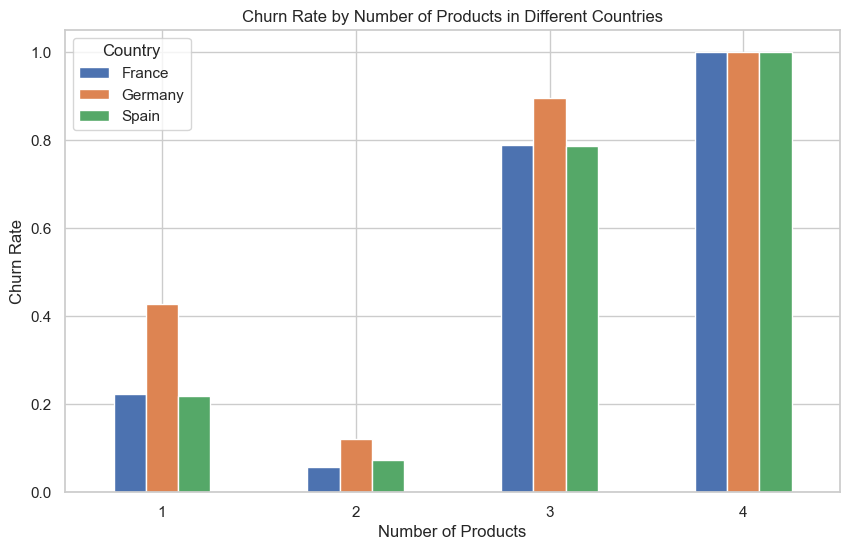

In [31]:
ax = churn_rate_pivoted.plot(kind='bar', figsize=(10, 6), rot=0)
ax.set_xlabel('Number of Products')
ax.set_ylabel('Churn Rate')
ax.set_title('Churn Rate by Number of Products in Different Countries')
ax.legend(title='Country', loc='upper left')
plt.show()

Not only do we see that customers with 4 products churn 100% of the time, we also see that we have high churn rates for customers that have 3 products as well. 

### 3.1.7 Plotly

In [32]:
fig = px.histogram(df, x='age', y='balance', color='churn',
                   marginal='violin',
                   hover_data=df.columns)
fig.show()

In this plot, we see that churned customers are older in the violin plot, which aligns with our previous findings. We also see that of the people who churned, they have a much lower total balance than the people who did not churn.

### 3.1.8 Heatmap

<AxesSubplot:>

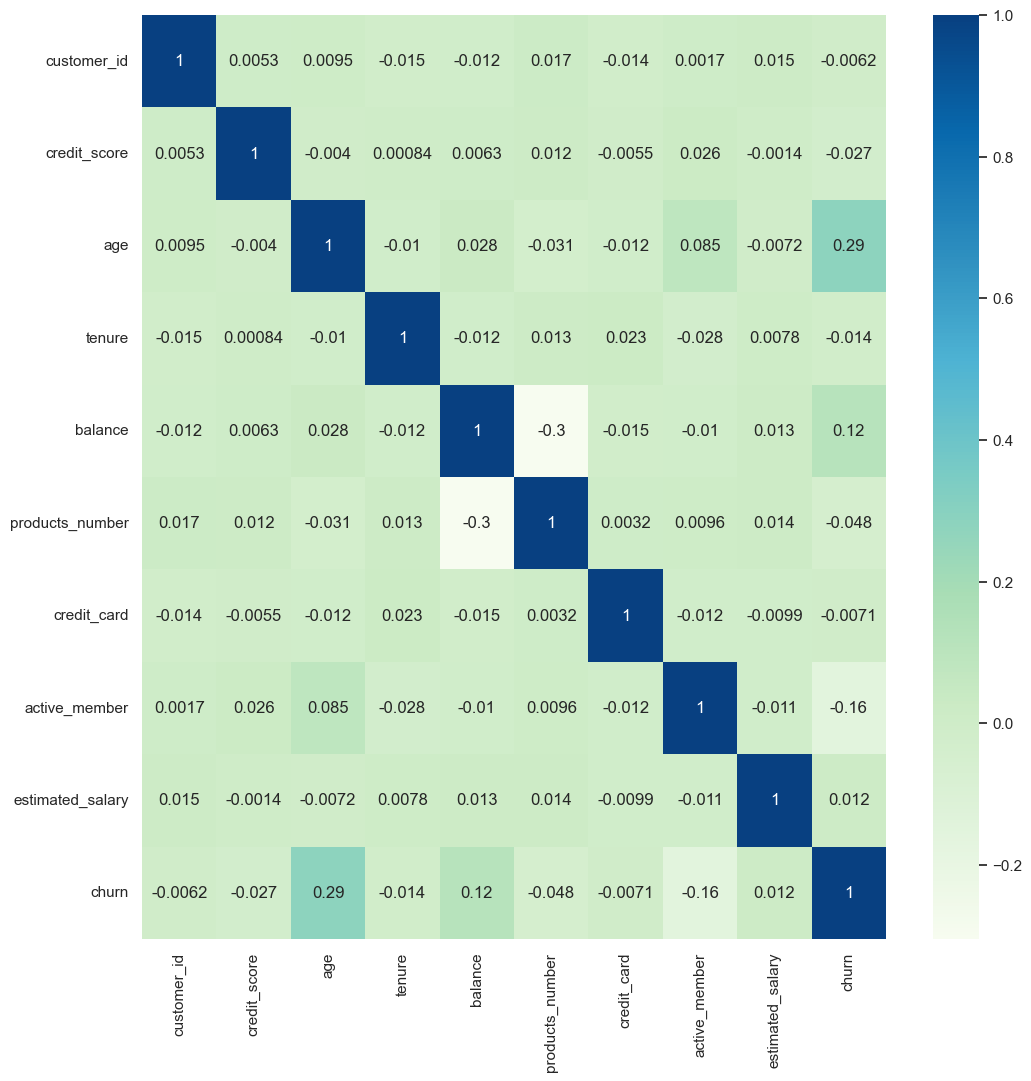

In [33]:
plt.figure(figsize=(12,12))
sns.heatmap(data=df.corr(), annot=True, cmap="GnBu")

We see that `age` has the highest positive correlation with churned customers. Based on this and our exploratory graphs, we can say that older customers are more likely to churn than younger ones. 

### 3.1.9 Important Observations
1. Around 20% of customers have churned.
2. Germany has the customers that churn the most by far. Customers in France and Spain churn about equally, with French people churning slightly less. 
2. Females churned more than males.
3. Older people churn more than younger people, especially in the 46-60 age group. The 46-60 age group is the only group that churns more than they do not. Age is also the variable with the highest correlation with churned customers. 
4. Customers with more products from the bank churn more than customers with less products. We found that customers with 4 products churned 100% of the time. Do more credit card influence spending habits in a negative way, which is causing this?

# 4. Prepare Data (Data Preprocessing)
Perform data cleaning, feature engineering, feature selection, data transformations, and data preprocessing.


## 4.1 Data cleaning

In [34]:
# see our df
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,age_bins
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,31-45
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,31-45
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,31-45
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,31-45
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,31-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0,31-45
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,31-45
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1,31-45
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,31-45


We don't need `customer_id` or `age_bins`. We also need to encode `country` and `gender`.

In [35]:
# drop age_bins
df.drop('age_bins', axis=1, inplace=True)

In [36]:
# drop customer_id
df.drop('customer_id', axis=1, inplace=True)

In [37]:
# verify we dropped the columns
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [38]:
# convert categorical features to numerical (LabelEncoder)
df['country'] = LabelEncoder().fit_transform(df['country'])
df['gender'] = LabelEncoder().fit_transform(df['gender'])

After encoding the variables, for the `country` variable, France = 0, Germany = 1, Spain = 2. For the `gender` variable, Female = 0, Male = 1.

In [39]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


We can see above that France = 0, Germany = 1, Spain = 2 in the `country` variable and Female = 0, Male = 1 for the `gender` variable.

## 4.2 Feature selection
Since we have a mix of numerical and categorical input variables, a popular approach to feature selection is to use tree-based methods, such as decision trees or Random Forests because they can handle both numerical and categorical input variables and provide feature importances that can be used for feature selection. You can use the feature importances provided by a Random Forest model, for example, to rank the input variables and then select the top K most important features. Or we can use a recursive feature elimination (RFE) technique with a suitable classifier that can handle both numerical and categorical input variables, such as a decision tree, Random Forest, or logistic regression (after encoding the categorical variables). *Or we can test both, then evaluate the performance of the model with different subsets of features to find the best approach*.

### 4.2.1 Random Forest method

In [40]:
# instantiate a random forest model
model = RandomForestClassifier()

# fit the model on the data
model.fit(df.drop('churn', axis=1), df['churn'])

RandomForestClassifier()

In [41]:
# get feature importances
importances = model.feature_importances_

# get indices of top features
k = 10
indices = np.argsort(importances)[-k:]

# get names of selected features
selected_feature_names = df.drop('churn', axis=1).columns[indices]
selected_feature_names

Index(['credit_card', 'gender', 'country', 'active_member', 'tenure',
       'products_number', 'balance', 'credit_score', 'estimated_salary',
       'age'],
      dtype='object')

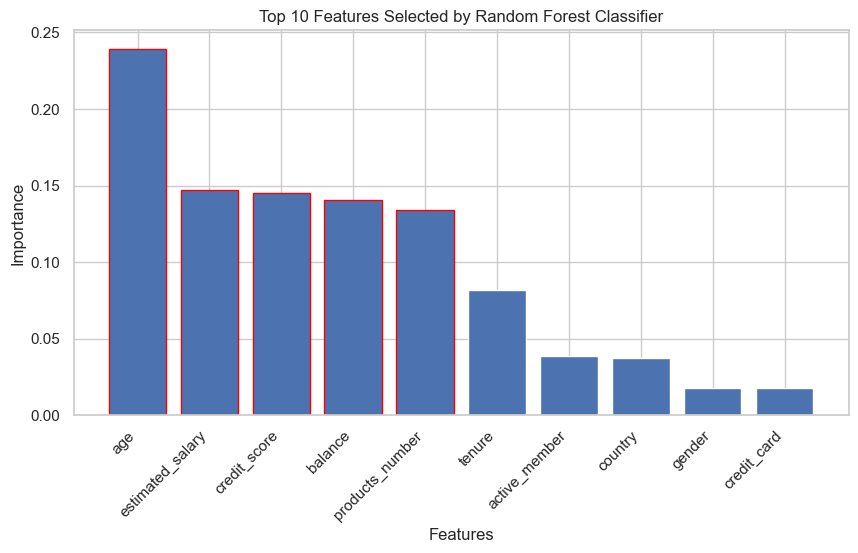

In [42]:
# get the feature importances of the top features
top_importances = importances[indices]

# sort features and their importances in desc order
sorted_idx = np.argsort(top_importances)[::-1]
sorted_feature_names = selected_feature_names[sorted_idx]
sorted_importances = top_importances[sorted_idx]

# make bar plot
plt.figure(figsize=(10,5))
#plt.bar(sorted_feature_names, sorted_importances,
#        color=['red', 'red', 'red', 'red', 'red', 
#               'blue', 'blue', 'blue', 'blue', 'blue'])
plt.bar(sorted_feature_names, sorted_importances,
        # red outline for top 5
        edgecolor=['red', 'red', 'red', 'red', 'red', 
               'white', 'white', 'white', 'white', 'white'])
plt.xlabel('Features')
plt.xticks(rotation=45,
           ha="right")
plt.ylabel('Importance')
plt.title('Top 10 Features Selected by Random Forest Classifier')
plt.show()

Above are the top 10 features based on features importance selected by a Random Forest Classifier. As we can see in the plot, there is a pretty significant drop after feature 5 (`products_number`), so we will only take the top 5 features. Therefore, we find that the 5 most important features are `age`, `estimated_salary`, `credit_score`, `balance`, `products_number`.

In [43]:
# select top 5 features to keep
top_feature_names = sorted_feature_names[:5]
top_feature_names

Index(['age', 'estimated_salary', 'credit_score', 'balance',
       'products_number'],
      dtype='object')

### 4.2.2 Split data and Scaling

In [44]:
# split into training and test sets
X = df[top_feature_names]
y=df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# scaling the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Model Selection, Training, and Evaluation
Choose appropriate machine learning algorithms based on the problem, data characteristics, and desired outcomes. Then train and evaluate the model. 

## 5.0 Null Accuracy

In [46]:
# examine class distribution of testing set
y_test.value_counts()

0    1607
1     393
Name: churn, dtype: int64

In [47]:
# calculate percentage of 1s
# because y_test is only ones and zeros, we can simply calculate the mean = percentage of ones
y_test.mean()

0.1965

In [48]:
# calculate percentage of 0s
1 - y_test.mean()

0.8035

In [49]:
# calculate null accuracy 
max(y_test.mean(), 1-y_test.mean())

0.8035

**This means that a dumb model that always predicts 0 would be correct 80.35% of the time. This shows the minimum we should achieve with our model.**

## 5.1 Logistic Regression

In [50]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train) 

LogisticRegression()

In [51]:
y_pred_logreg = logreg.predict(X_test_scaled)
print('Accuracy: ', accuracy_score(y_test, y_pred_logreg))
print('Classification report: \n', classification_report(y_test, y_pred_logreg))
print('CM: \n', confusion_matrix(y_test, y_pred_logreg))
print('AUC: ', roc_auc_score(y_test, y_pred_logreg))

Accuracy:  0.789
Classification report: 
               precision    recall  f1-score   support

           0       0.81      0.97      0.88      1607
           1       0.32      0.06      0.11       393

    accuracy                           0.79      2000
   macro avg       0.56      0.52      0.49      2000
weighted avg       0.71      0.79      0.73      2000

CM: 
 [[1553   54]
 [ 368   25]]
AUC:  0.5150051223099955


This is a bad model. The accuracy is below the null accuracy and it does terribly when predicting when a customer will churn. 

## 5.2 Neural Network

In [52]:
# make NN classifier
# initialize classifier
mlp = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=1000, random_state=0)

# train on training data
mlp.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=0)

In [53]:
# make predictions and evaluate
y_pred_nn = mlp.predict(X_test_scaled)

print("Accuracy: ", accuracy_score(y_test, y_pred_nn))
print('Classification report: \n', classification_report(y_test, y_pred_nn))
print('CM: \n', confusion_matrix(y_test, y_pred_nn))

print('AUC: ', roc_auc_score(y_test, y_pred_nn))


Accuracy:  0.847
Classification report: 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      1607
           1       0.69      0.41      0.51       393

    accuracy                           0.85      2000
   macro avg       0.78      0.68      0.71      2000
weighted avg       0.83      0.85      0.83      2000

CM: 
 [[1534   73]
 [ 233  160]]
AUC:  0.6808492109109161


This model has an overall accuracy of 84% and performs better in predicting customers who will not churn. It also does better at predicting when a customer will churn compared to the Logistic Regression model, but it still does not do that very well and should be improved.
In the minority class (predicting churn) it predicts 179 correct out of 393. For the majority class, it incorrectly predicted 106 out of 1607. This model also has a poor AUC score of 0.69, which is "poor discrimination". We should be aiming for 0.8-0.9, which is considered "excellent". 0.7-0.8 is also considered "acceptable".

## 5.3 XGBoost

In [54]:
# select most important features
X = df[top_feature_names] # age, estimated_salary, credit_score, balance, products_number
y = df['churn']

# balance the dataset by oversampling minority class (SMOTE)
smote = SMOTE(random_state=0)
X_res, y_res = smote.fit_resample(X, y)

# split into training and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_res, y_res, test_size=0.2, random_state=0)

In [55]:
# standardize
# this means the data has a mean of 0 and a std deviation of 1
scaler2 = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

In [56]:
# train XGB classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)
# fit model
xgb_clf.fit(X_train_scaled2, y_train2)
# make predictions
y_pred2 = xgb_clf.predict(X_test_scaled2)

In [57]:
# eval
print('Accuracy: ', accuracy_score(y_test2, y_pred2)) # how often it was correct
print('Classification report: \n', classification_report(y_test2, y_pred2))
print('CM: \n', confusion_matrix(y_test2, y_pred2)) # where mistakes were
print('AUC score: ', roc_auc_score(y_test2, y_pred2)) # how well it distinguishes between classes

Accuracy:  0.788135593220339
Classification report: 
               precision    recall  f1-score   support

           0       0.80      0.76      0.78      1590
           1       0.78      0.81      0.79      1596

    accuracy                           0.79      3186
   macro avg       0.79      0.79      0.79      3186
weighted avg       0.79      0.79      0.79      3186

CM: 
 [[1216  374]
 [ 301 1295]]
AUC score:  0.7880916914928832


This model is quite good compared to the neural network model and logistic regression model. The accuracy shows the model is correct about 79% of the time. The precision, recall, and F1-score for both classes are quite balanced, which suggests the model performs equally well for both classes. The AUC score is also considered acceptable, almost considered excellent (0.8-0.9). 

# 6. Model Optimization
Make improvements to your model.

## 6.1 NN hyperparameter tuning

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

In [59]:
# # define parameter grid for NN
# parameter_grid = {
#     'hidden_layer_sizes': [(50,), (100,), (50,50)],
#     'activation': ['relu', 'tanh'], 
#     'solver': ['adam', 'sgd'],
#     'alpha': [0.0001, 0.001, 0.01],
#     'learning_rate': ['constant', 'adaptive'],
#     'max_iter': [500]
# }

In [60]:
# # make GridSearchCV object with MLPClassifier parameter grid
# nn_clf = MLPClassifier(random_state=0)
# grid_search = GridSearchCV(nn_clf, parameter_grid, scoring='accuracy', cv=5, n_jobs=-1)

In [61]:
# # fit grid_search to training data
# grid_search.fit(X_train_scaled, y_train)

In [62]:
# print("Best parameters found: ", grid_search.best_params_)

In [63]:
# make new NN with best hyperparameters
optimized_nn = MLPClassifier(
    activation='tanh',
    alpha=0.01,
    hidden_layer_sizes=(50,50),
    learning_rate='constant',
    max_iter=500,
    solver='adam'
)
# train optimized model on training data
optimized_nn.fit(X_train_scaled, y_train)

# make predictions
y_pred_optimized = optimized_nn.predict(X_test_scaled)

In [64]:
# evaluate
print("Accuracy: ", accuracy_score(y_test, y_pred_optimized))
print('Classification report: \n', classification_report(y_test, y_pred_optimized))
print('CM: \n', confusion_matrix(y_test, y_pred_optimized))
print('AUC score: ', roc_auc_score(y_test, y_pred_optimized))


Accuracy:  0.8375
Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      1607
           1       0.61      0.46      0.53       393

    accuracy                           0.84      2000
   macro avg       0.75      0.70      0.72      2000
weighted avg       0.82      0.84      0.83      2000

CM: 
 [[1493  114]
 [ 211  182]]
AUC score:  0.6960823433103582


## 6.2 Oversampling minority class (SMOTE)
*To try and further improve our model, we will now fix the class imbalance by oversampling the minority class*

In [65]:
# resample data
smt = SMOTE(random_state=42) # for reproducibility

X_train_sm, y_train_sm = smt.fit_resample(X_train_scaled, y_train)


In [66]:
# refit the optimized model
optimized_nn.fit(X_train_sm, y_train_sm)

MLPClassifier(activation='tanh', alpha=0.01, hidden_layer_sizes=(50, 50),
              max_iter=500)

In [70]:
# make predictions
y_pred_opt_nn_smt = optimized_nn.predict(X_test_scaled)

# evaluate
print('Accuracy: ', accuracy_score(y_test, y_pred_opt_nn_smt))
print('Classification report: \n', classification_report(y_test, y_pred_opt_nn_smt))
print('CM: \n', confusion_matrix(y_test, y_pred_opt_nn_smt))
print("AUC score: ", roc_auc_score(y_test, y_pred_opt_nn_smt))

Accuracy:  0.772
Classification report: 
               precision    recall  f1-score   support

           0       0.92      0.79      0.85      1607
           1       0.45      0.70      0.55       393

    accuracy                           0.77      2000
   macro avg       0.68      0.75      0.70      2000
weighted avg       0.82      0.77      0.79      2000

CM: 
 [[1268  339]
 [ 117  276]]
AUC score:  0.7456689958530663


While the overall accuracy decreased, there is a significant improvement in recall for the minority class (0.41 to 0.70), which means the model is now able to identify a larger proportion of actual positive cases correctly. The AUC score also increased, which suggests the model is performing better at distinguishing between the 2 classes. Although the model decreased in accuracy, since correctly predicting the minority class (churn) is the most important thing here, this model might be a better choice than the previous one. 

**STEPS TO IMPROVE PERFORMANCE:**
1. handle class imbalance: main issue here. the number of non-churned customers is larger than churned by alot, giving poor performance for minority class. can fix by oversampling minority class (using SMOTE algo for this is good), undersampling majority class, or combo of both
2. feature engineering: see if you can engineer new features that could be predictive of churn. based on domain knowledge or creating interaction features between existing ones
3. try diff models: NN isnt always best for the job. try others like: Gradient Boosting (e.g., xgb, lightGBM) or SVMs. ensemble methods, like stacking or voting, can also sometimes improve it
4. model tuning: might still be able to improve the hyperparameter tuning you did. can try a more extensive grid search or use a diff method for hyperparam optimization, such as random search or Bayesian optimization

## 6.3 XGB Hyperparameter tuning

In [72]:
# Define the parameter grid
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7],
    'colsample_bytree': [0.5, 0.7],
    'n_estimators' : [100, 200, 500],
    'objective': ['binary:logistic']
}

# Create a base model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = xgb, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train_scaled2, y_train2)

# Print the best parameters
print(grid_search.best_params_)


Fitting 3 folds for each of 432 candidates, totalling 1296 fits
{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 500, 'objective': 'binary:logistic', 'subsample': 0.7}


In [73]:
best_params_xgb = grid_search.best_params_
optimized_xgb = XGBClassifier(
    **best_params_xgb, 
    use_label_encoder = False,
    eval_metric = 'logloss',
    random_state = 0
)
optimized_xgb.fit(X_train_scaled2, y_train2)
y_pred_opt_xgb = optimized_xgb.predict(X_test_scaled2)

In [74]:
# eval
print('Accuracy: ', accuracy_score(y_test2, y_pred_opt_xgb))
print('Classification report: \n', classification_report(y_test2, y_pred_opt_xgb))
print('CM: \n', confusion_matrix(y_test2, y_pred_opt_xgb))
print('AUC score: ', roc_auc_score(y_test2, y_pred_opt_xgb))

Accuracy:  0.795668549905838
Classification report: 
               precision    recall  f1-score   support

           0       0.81      0.77      0.79      1590
           1       0.78      0.82      0.80      1596

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.80      0.80      0.80      3186

CM: 
 [[1232  358]
 [ 293 1303]]
AUC score:  0.795629403697924


Tuning the hyperparameters gave us a very slight improvement in all the metrics.

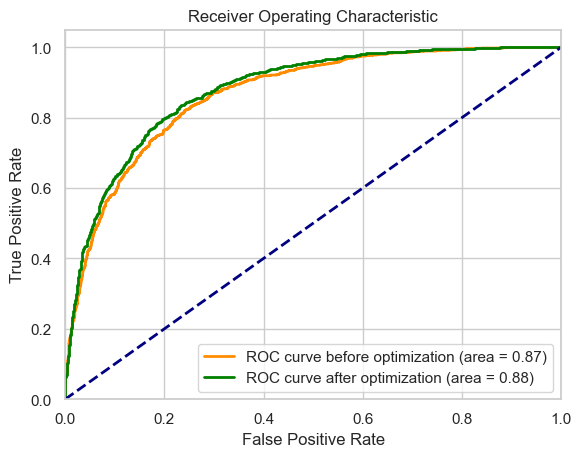

In [75]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the FPR and TPR for both models
fpr_before, tpr_before, _ = roc_curve(y_test2, xgb_clf.predict_proba(X_test_scaled2)[:, 1])
roc_auc_before = auc(fpr_before, tpr_before)

fpr_after, tpr_after, _ = roc_curve(y_test2, optimized_xgb.predict_proba(X_test_scaled2)[:, 1])
roc_auc_after = auc(fpr_after, tpr_after)

# Plot the ROC curve
plt.figure()
lw = 2  # line width
plt.plot(fpr_before, tpr_before, color='darkorange', lw=lw, label='ROC curve before optimization (area = %0.2f)' % roc_auc_before)
plt.plot(fpr_after, tpr_after, color='green', lw=lw, label='ROC curve after optimization (area = %0.2f)' % roc_auc_after)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# 7. Conclusion
Interpret the results of the best model and derive insights and communicate the findings, and make recommendations to stakeholders.